# Определение стоимости автомобилей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка данных" data-toc-modified-id="Подготовка данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение моделей" data-toc-modified-id="Обучение моделей"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Анализ моделей" data-toc-modified-id="Анализ моделей"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></div>

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [1]:
# загрузим необходимые бибилиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import make_scorer
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузим данные
try:
    df = pd.read_csv('/datasets/autos.csv')
except:
    df = pd.read_csv('/Users/alex/Desktop/Яндекс_Практикум/Проекты/Численные_методы/autos.csv')

display(df)
df.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Признаки  

* `DateCrawled` — дата скачивания анкеты из базы
* `VehicleType` — тип автомобильного кузова
* `RegistrationYear` — год регистрации автомобиля
* `Gearbox` — тип коробки передач
* `Power` — мощность (л. с.)
* `Model` — модель автомобиля
* `Kilometer` — пробег (км)
* `RegistrationMonth` — месяц регистрации автомобиля
* `FuelType` — тип топлива
* `Brand` — марка автомобиля
* `NotRepaired` — была машина в ремонте или нет
* `DateCreated` — дата создания анкеты
* `NumberOfPictures` — количество фотографий автомобиля
* `PostalCode` — почтовый индекс владельца анкеты (пользователя)
* `LastSeen` — дата последней активности пользователя  

Целевой признак
* `Price` — цена (евро)

In [3]:
# переименуем столбцы
df.columns = df.columns.str.lower()
df.columns = [ 'date_crawled' , 'price' , 'vehicle_type' , 'registration_year' , 'gearbox' ,
               'power' , 'model' , 'kilometer' , 'registration_month' , 'fuel_type' , 'brand' ,
               'not_repaired' , 'date_created' , 'number_of_pictures' , 'postal_code' ,
               'last_seen' ]
df.sample()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
263699,2016-03-16 20:53:38,175,small,1998,manual,0,polo,150000,0,petrol,volkswagen,no,2016-03-16 00:00:00,0,48683,2016-03-30 17:16:32


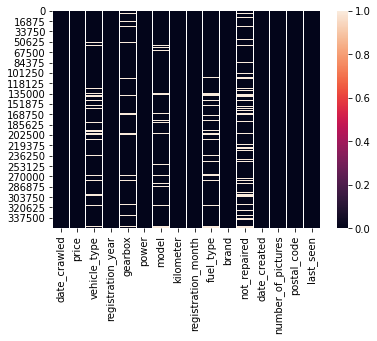

date_crawled - 0.0%
price - 0.0%
vehicle_type - 10.58%
registration_year - 0.0%
gearbox - 5.6%
power - 0.0%
model - 5.56%
kilometer - 0.0%
registration_month - 0.0%
fuel_type - 9.28%
brand - 0.0%
not_repaired - 20.08%
date_created - 0.0%
number_of_pictures - 0.0%
postal_code - 0.0%
last_seen - 0.0%


In [4]:
# тепловая карта пропущенных значений
# пропущенные значения в процентах
sns.heatmap(df.isnull())
plt.show()

for cl in df.columns:
    pctm = np.mean(df[cl].isnull())
    print('{} - {}%'.format(cl, round((pctm*100), 2)))

In [5]:
# самый свежий год скачивания анкет
pd.to_datetime(df['date_crawled']).dt.year.max()

2016

In [6]:
# количество уникальных значения в столбцах
df.nunique()

date_crawled          271174
price                   3731
vehicle_type               8
registration_year        151
gearbox                    2
power                    712
model                    250
kilometer                 13
registration_month        13
fuel_type                  7
brand                     40
not_repaired               2
date_created             109
number_of_pictures         1
postal_code             8143
last_seen             179150
dtype: int64

In [7]:
# уникальные значения
display(df['vehicle_type'].unique())
display(df['gearbox'].unique())
display(df['kilometer'].unique())
display(df['registration_month'].unique())
display(df['fuel_type'].unique())
df['not_repaired'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

array(['manual', 'auto', nan], dtype=object)

array([150000, 125000,  90000,  40000,  30000,  70000,   5000, 100000,
        60000,  20000,  80000,  50000,  10000])

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

array([nan, 'yes', 'no'], dtype=object)

In [8]:
# заменим пропуски, удалим дубликаты, месяц 0 заменим на месяц 1, столбец с пробегом изменим на категориальный
df['vehicle_type'] = df['vehicle_type'].fillna('other')
df['fuel_type'] = df['fuel_type'].fillna('other')
df = df.fillna('unknown')
df.registration_month = df.registration_month.replace(0, 1, inplace=False)
df['kilometer'] = df['kilometer'].astype('object')
display(df.isnull().sum())
df.drop_duplicates(inplace=True)
df.duplicated().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

0

Удалим столбцы с датой скачивания анкеты из базы, датой создания анкеты, количеством фотографий автомобиля, почтовым индекс владельца анкеты (пользователя), датой последней активности пользователя, месяцем регистрации, т.к. не несут полезной информации для дальнейшего исследования и построения моделей.

In [9]:
# удалим ненужные в дальнейшем исследовании столбцы
df = df.drop(['date_crawled', 'registration_month', 'date_created',
              'number_of_pictures', 'postal_code', 'last_seen'], axis = 1)
df.sample()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
239975,699,wagon,1995,manual,150,5er,150000,petrol,bmw,unknown


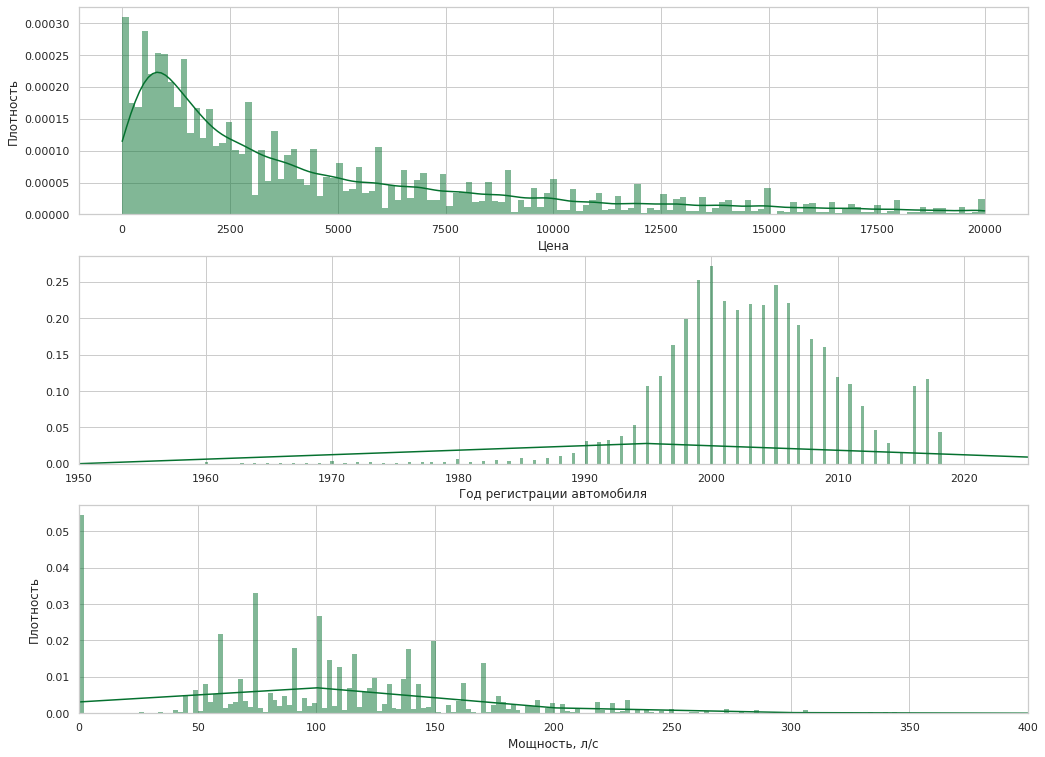

In [10]:
# распределение количественных переменных
sns.set_theme(style="whitegrid", palette="Greens_r")
fig, axes = plt.subplots(3,1)
fig.set_size_inches(17, 13)
ax  = sns.histplot(df['price'], kde=True, stat='density', linewidth=0,  ax = axes[0])
ax1 = sns.histplot(df['registration_year'], kde=True, stat='density', linewidth=0, ax = axes[1])
ax2 = sns.histplot(df['power'], kde=True, stat='density', linewidth=0, ax = axes[2])

ax.set(xlabel = 'Цена',
      ylabel = 'Плотность')
ax1.set(xlabel = 'Год регистрации автомобиля',
      ylabel = '')
ax1.set_xlim(left = 1950, right=2025)
ax2.set(xlabel = 'Мощность, л/с',
      ylabel = 'Плотность')
ax2.set_xlim(left = 0, right=400)
plt.show()

In [11]:
# удалим выбросы
df = df[df['price'] > 100]
df = df[(df['power'] > 10) & (df['power'] < 400)]
df = df[(df['registration_year'] > 1980) & (df['registration_year'] < 2017)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291755 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              291755 non-null  int64 
 1   vehicle_type       291755 non-null  object
 2   registration_year  291755 non-null  int64 
 3   gearbox            291755 non-null  object
 4   power              291755 non-null  int64 
 5   model              291755 non-null  object
 6   kilometer          291755 non-null  object
 7   fuel_type          291755 non-null  object
 8   brand              291755 non-null  object
 9   not_repaired       291755 non-null  object
dtypes: int64(3), object(7)
memory usage: 24.5+ MB


Осталось более `82%` от исходных данных.

In [12]:
# посмотрим описательные статистики
df.describe()

,price,registration_year,power
count,291755.000000,291755.000000,291755.000000
mean,4848.544525,2003.099799,120.565330
std,4585.529791,5.867186,52.226447
min,101.000000,1981.000000,11.000000
25%,1350.000000,1999.000000,77.000000
50%,3200.000000,2003.000000,113.000000
75%,6990.000000,2007.000000,150.000000
max,20000.000000,2016.000000,399.000000


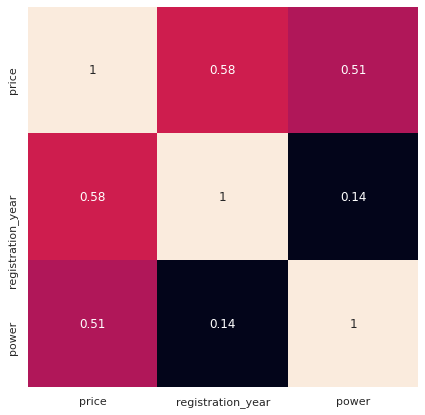

In [13]:
# кореляционная матрица
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, ax=ax, cbar=False)
plt.show()

In [14]:
# разобъём данные на обучающую и тестовую выборки
random_state = 13
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_state)
features_train = df_train.drop(['price'], axis=1)
target_train = df_train['price']
features_test = df_test.drop(['price'], axis=1)
target_test = df_test['price']
print(f'Обучающая: {features_train.shape[0] / len(df):.0%}')
print(f'Тестовая: {features_test.shape[0] / len(df):.0%}')

Обучающая: 80%
Тестовая: 20%


**Вывод**  

Данные загружены и обработаны:

* переименованы столбцы;
* заменены пропуски и удалены дубликаты;
* удалены столбцы с неинформативными данными;
* удалены выбросы;
* наблюдается корреляция между целевым признаком  `price` и переменными `registration_year`, `power`;
* данные разделены на выборки, выделен целевой признак.


## Обучение моделей

### CatBoost

In [15]:
%%time
# подберём наилучшие гипермараметры с помощью GridSearchCV для CatBoostRegressor
# запишем RMSE в собственную функцию потерь

def RMSE(actual, predict):
    return np.sqrt(MSE(actual, predict))
my_scorer = make_scorer(RMSE, greater_is_better = False)

catboost_features = ['vehicle_type', 'gearbox', 'model', 'kilometer', 'fuel_type', 'brand',
                     'not_repaired']

catboost = CatBoostRegressor(random_state=random_state, cat_features=catboost_features)
param_grid_c =  {'depth': [2, 6, 12, 20],
               'iterations': [10, 100, 200]}

#grid_search_catboost = GridSearchCV(catboost, param_grid=param_grid_c, verbose=100, scoring = my_scorer)
#grid_search_catboost.fit(features_train, target_train)
#display(grid_search_catboost.best_params_)

CPU times: user 97 µs, sys: 3 µs, total: 100 µs
Wall time: 104 µs


Наилучшие гиперпараметры модели `CatBoostRegressor` : `{'depth': 12, 'iterations': 200}` :

In [16]:
%%time
# обучим модель catboost
catboost = CatBoostRegressor(iterations = 200, depth = 12, random_state = random_state, verbose=100,
                             cat_features=catboost_features)
catboost.fit(features_train, target_train)

Learning rate set to 0.358594
0:	learn: 3389.1882443	total: 973ms	remaining: 3m 13s
100:	learn: 1305.1229315	total: 1m 31s	remaining: 1m 29s
199:	learn: 1204.1973286	total: 3m 5s	remaining: 0us
CPU times: user 3min 6s, sys: 1.08 s, total: 3min 7s
Wall time: 3min 8s


Время обучения модели `CatBoostRegressor`: `3min 8s` .  

In [17]:
%%time
# предсказания и метрика catboost
catboost_pred_test = catboost.predict(features_train)
display(RMSE(target_train, catboost_pred_test))

1274.6432778278208

CPU times: user 1.77 s, sys: 11.9 ms, total: 1.78 s
Wall time: 1.78 s


Наилучшее значения `RMSE` у модели `CatBoostRegressor`: `1274`, время предсказания: `1.78 s` .

In [18]:
# кросс-валидация catboost
catboost_cv = (cross_val_score(catboost, features_train, target_train, cv = 2,
                               scoring = 'neg_root_mean_squared_error')).mean()
catboost_cv

Learning rate set to 0.321396
0:	learn: 3510.5165020	total: 423ms	remaining: 1m 24s
100:	learn: 1281.5753742	total: 51.8s	remaining: 50.8s
199:	learn: 1156.0783492	total: 1m 43s	remaining: 0us
Learning rate set to 0.321396
0:	learn: 3507.9613545	total: 458ms	remaining: 1m 31s
100:	learn: 1266.1162808	total: 52.4s	remaining: 51.3s
199:	learn: 1149.6699235	total: 1m 46s	remaining: 0us


-1528.0744774563868

Кросс-валидация `CatBoostRegressor`: `1528`.

### LightGBM

In [19]:
%%time
# подберём наилучшие гипермараметры с помощью GridSearchCV для LightGBM
lightgbm_features  = ['vehicle_type', 'gearbox', 'model', 'kilometer', 'fuel_type', 'brand', 'not_repaired']
features_train_lightgbm = features_train.copy()
for c in lightgbm_features:
    features_train_lightgbm[c] = features_train_lightgbm[c].astype('category')

lightgbm = lgb.LGBMRegressor(num_iterations=1000, categorical_feature = lightgbm_features, random_state=random_state)
param_grid_l = {'max_depth': [4, 8, 12, 16, 20],
              'n_estimators': [150, 200, 500]}

#grid_search_lightgbm = GridSearchCV(estimator = lightgbm, cv=2, param_grid = param_grid_l,
#                                    verbose=100, scoring = my_scorer)
#grid_search_lightgbm.fit(features_train_lightgbm, target_train)
#display(grid_search_lightgbm.best_params_)

CPU times: user 188 ms, sys: 4 ms, total: 192 ms
Wall time: 196 ms


Наилучшие гиперпараметры модели `LightGBM` : `{'max_depth': 16, 'n_estimators': 150}` .

In [20]:
%%time
# обучим модель LightGBM
lightgbm = lgb.LGBMRegressor(num_iterations=1000, max_depth=16, n_estimators=150,
                             random_state=random_state, categorical_feature = lightgbm_features)
lightgbm.fit(features_train_lightgbm, target_train)

CPU times: user 32.8 s, sys: 147 ms, total: 32.9 s
Wall time: 33.3 s


LGBMRegressor(categorical_feature=['vehicle_type', 'gearbox', 'model',
                                   'kilometer', 'fuel_type', 'brand',
                                   'not_repaired'],
              max_depth=16, n_estimators=150, num_iterations=1000,
              random_state=13)

Время обучения модели `LGBMRegressor`: `33.3 s`.

In [21]:
%%time
# предсказания и метрика LightGBM
lightgbm_pred_test = lightgbm.predict(features_train_lightgbm)
display(RMSE(target_train, lightgbm_pred_test))

1297.1072763541017

CPU times: user 29.2 s, sys: 14.5 ms, total: 29.2 s
Wall time: 29.3 s


Наилучшее значение `RMSE` у модели `LightGBM`: `1297`, время предсказания: `29.3 s` .

In [22]:
# кросс-валидация LightGBM
lightgbm_cv = (cross_val_score(lightgbm, features_train_lightgbm, target_train, cv = 2,
                               scoring = 'neg_root_mean_squared_error')).mean()
lightgbm_cv

-1492.2414597197057

Кросс-валидация `LightGBM`: `1492` .

### LinearRegression

In [23]:
%%time
# обучим модель LinearReg
features_train_lineareg = features_train.copy()
features_test_lineareg = features_test.copy()
# метод StandardScaler
features_train_lineareg = pd.get_dummies(features_train_lineareg, drop_first=True)
numeric = ['registration_year', 'power']
scaler = StandardScaler()
scaler.fit(features_train_lineareg[numeric])

features_train_lineareg[numeric] = scaler.transform(features_train_lineareg[numeric])
features_test_lineareg[numeric] = scaler.transform(features_test_lineareg[numeric])

lineareg = LinearRegression()#random_state=random_state)
lineareg.fit(features_train_lineareg, target_train)

CPU times: user 15.7 s, sys: 6.43 s, total: 22.2 s
Wall time: 22.2 s


LinearRegression()

Время обучения модели `LinearRegression`: `22.2 s`.

In [24]:
%%time
# предсказания и метрика LinearReg
pred_lineareg = lineareg.predict(features_train_lineareg)
display(RMSE(target_train, pred_lineareg))

2356.558006356182

CPU times: user 222 ms, sys: 220 ms, total: 442 ms
Wall time: 401 ms


Значение `RMSE` у модели `LinearRegression`: `2356`, время предсказания: `401 ms` .

In [25]:
# кросс-валидация LinearReg
lineareg_cv = (cross_val_score(lineareg, features_train_lineareg, target_train, cv = 2,
                               scoring = 'neg_root_mean_squared_error')).mean()
lineareg_cv 

-2361.9213028849663

Кросс-валидация `LinearReg`: `2361` .

## Анализ моделей

In [30]:
# сводная таблица с данными моделей
tab = pd.DataFrame({'Модель':['CatBoostRegressor', 'LGBMRegressor', 'LinearRegression'],
                    'Время обучения':['3min 8s', '33.3 s', '22.2 s'],
                    'Время предсказания': ['1.78 s', '29.3 s', '401 ms'],
                    'Кросс-валидация, RMSE': [abs(catboost_cv), abs(lightgbm_cv), abs(lineareg_cv)]})
tab

,Модель,Время обучения,Время предсказания,"Кросс-валидация, RMSE"
0,CatBoostRegressor,3min 8s,1.78 s,1528.074477
1,LGBMRegressor,33.3 s,29.3 s,1492.241460
2,LinearRegression,22.2 s,401 ms,2361.921303


Наиболее оптимальной моделью является `CatBoostRegressor`, наименьшее время предсказания, метрика сравнима с моделью `LGBMRegressor` , у `LinearRegression` хорошие показатели времени обучения и предсказания, но худший уровень качества.

In [27]:
# проверим модель на тестовой выборке
results = []
model = catboost
predictions_valid = catboost.predict(features_test)
rmse_ = MSE(target_test, predictions_valid)** 0.5
results.append({'Модель': model.__class__.__name__,
                'RMSE': rmse_})
pd.DataFrame(results)

,Модель,RMSE
0,CatBoostRegressor,1464.487787


Метрика `RMSE` на тестовой выборке с моделью `CatBoostRegressor`: `1464` .  
На тестовой выборке модель показала лучшие результаты, в сравнении с кросс-валидацией.

In [28]:
# важность признаков в модели catboost
pd.DataFrame(catboost.get_feature_importance(),
             index=features_test.dtypes.index,
             columns=['Рейтинг признаков']).sort_values(by='Рейтинг признаков',
                                                        ascending = False).style.bar(color=['#d65f5f', '#5fba7d'])

,Рейтинг признаков
registration_year,29.067592
power,22.102591
brand,12.783378
vehicle_type,10.522535
kilometer,8.996587
model,6.885951
not_repaired,3.907072
fuel_type,3.402150
gearbox,2.332144


**Вывод**  

Наиболее оптимальной моделью является `CatBoostRegressor` c гиперпараметрами `[iterations = 200, depth = 12]` .  
Значение метрики `RMSE` на кросс-валидации: `1528`, на тестовой выборке: `1464` .  
Время обучения модели составило: `3min 8s` .  
Время предсказания: `1.78 s` .  
Наибольшее значение имеют признаки: дата регистрации автомобиля, его мощность, марка, тип кузова и на пятом месте - пробег автомобиля.
Модель соответствует всем требованиям заказчика.